# Import

In [37]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from matplotlib.patches import Ellipse

from grace.visuomotor import PeopleAttention

# Initialization 

In [2]:
image_list = []
image_path_list = []
folder_path = os.path.join(os.getcwd(),'results', '231122_center_calib_2_filt3')
for i, filename in enumerate(sorted(os.listdir(folder_path))):
    img_path = os.path.join(folder_path, filename)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_list.append(image)
    image_path_list.append(img_path)

# Face Detection

In [3]:
# Face Detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(os.path.join(os.getcwd(),'pretrained','shape_predictor_68_face_landmarks.dat'))
dlib.cuda.set_device(0)

In [4]:
# Getting Target Pixels
pixel_list = []
disp_img_list = []
for i in range(len(image_list)):
    img = image_list[i]
    l_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector(l_gray, 0)
    if len(detections)>0:
        detection = detections[0]
        landmarks = predictor(img, detection)
        x_target = round((landmarks.part(40).x + landmarks.part(43).x)/2)
        y_target = round((landmarks.part(40).y + landmarks.part(43).y)/2)
        pixel_list.append((x_target, y_target))
        disp_img = cv2.rectangle(img, (detection.left(), detection.top()), (detection.right(), detection.bottom()), (0, 0, 255), 2)
        disp_img = cv2.drawMarker(disp_img, (x_target,y_target), color=(255, 0, 0), markerType=cv2.MARKER_TILTED_CROSS, markerSize=13, thickness=2)
        disp_img_list.append(disp_img)
    else:
        pixel_list.append((None, None))
        disp_img_list.append(img)

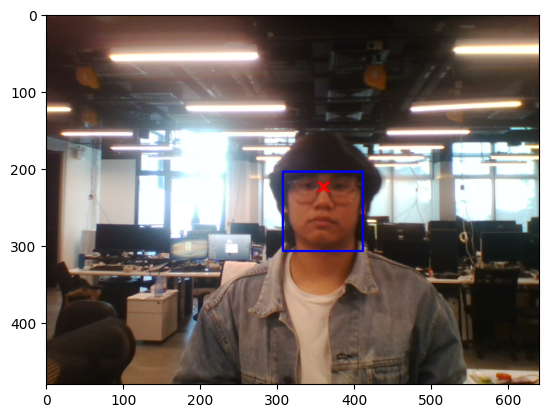

(360, 224)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125156_444274_left_eye.png


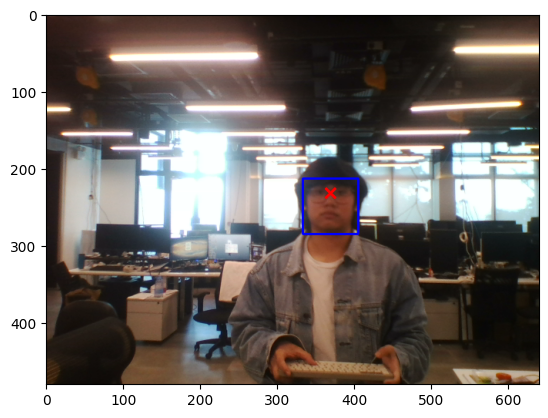

(369, 232)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125203_666021_left_eye.png


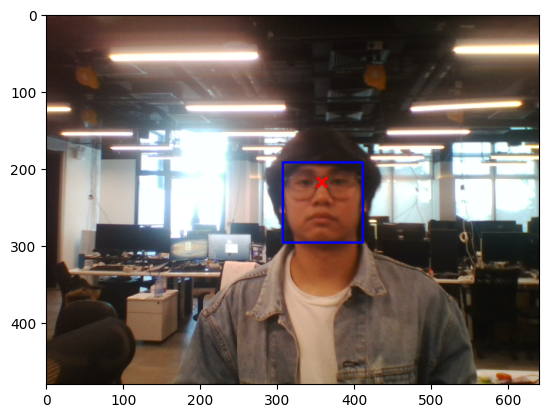

(358, 218)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125237_298280_left_eye.png


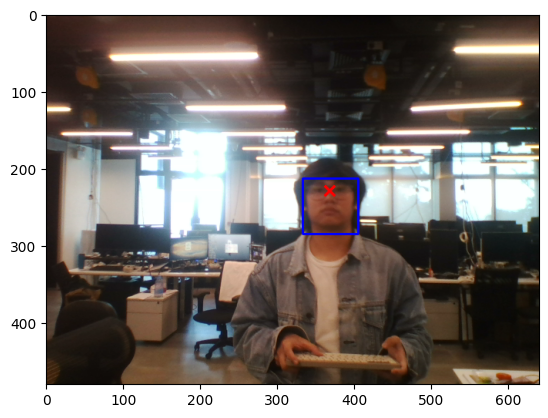

(368, 229)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125242_942272_left_eye.png


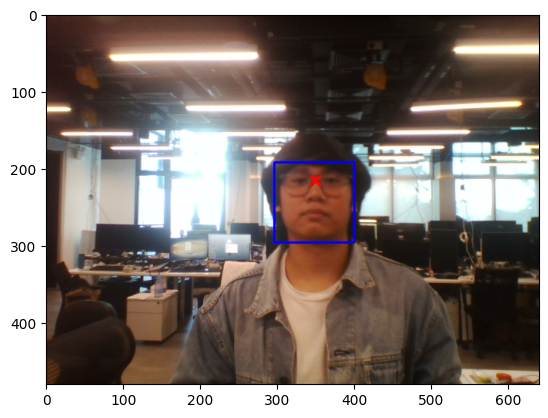

(350, 216)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125255_878471_left_eye.png


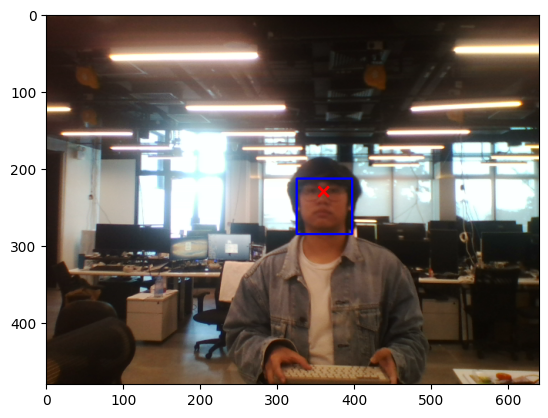

(360, 230)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125301_694539_left_eye.png


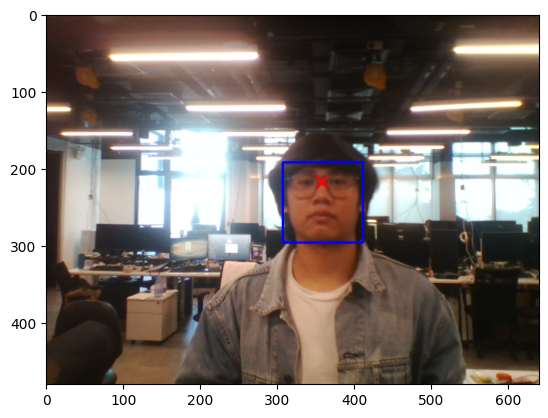

(358, 218)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125327_566854_left_eye.png


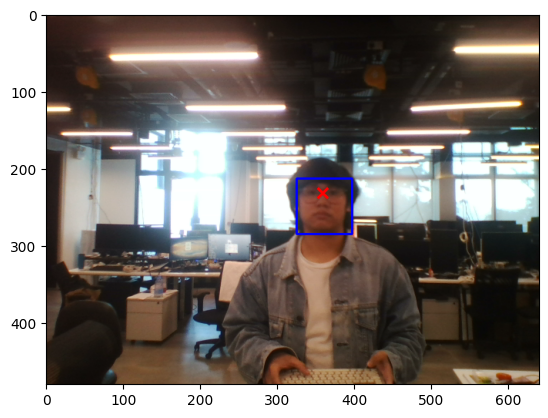

(359, 232)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125334_454882_left_eye.png


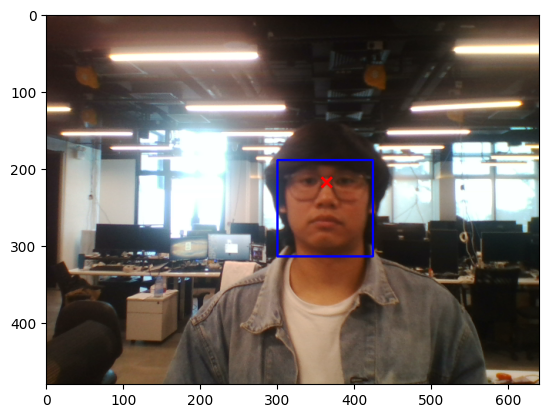

(364, 218)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125342_414944_left_eye.png


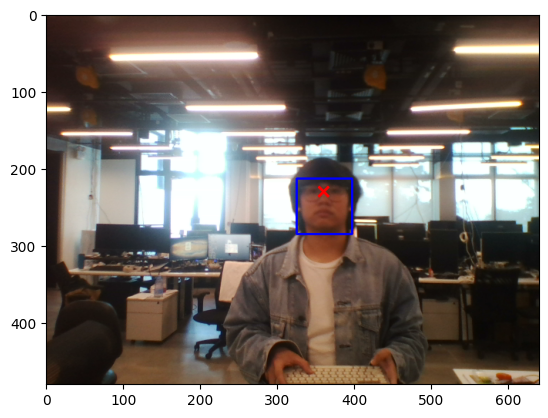

(360, 230)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125347_659074_left_eye.png


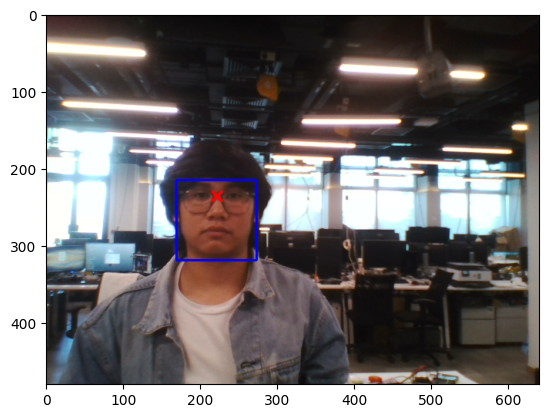

(222, 236)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125528_866615_right_eye.png


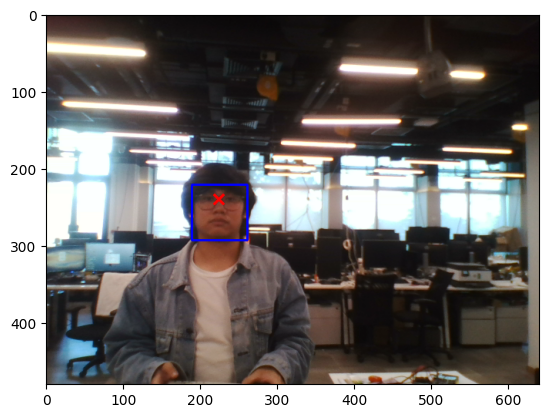

(224, 240)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125535_488730_right_eye.png


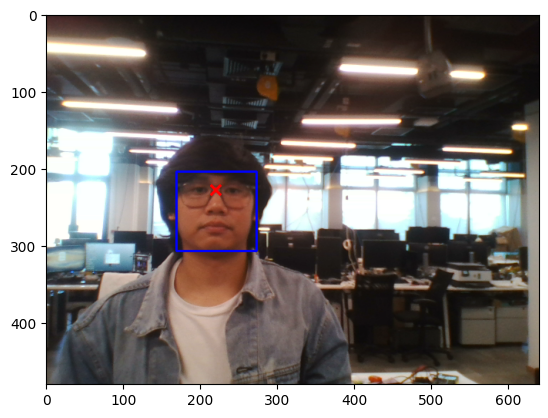

(220, 228)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125545_296835_right_eye.png


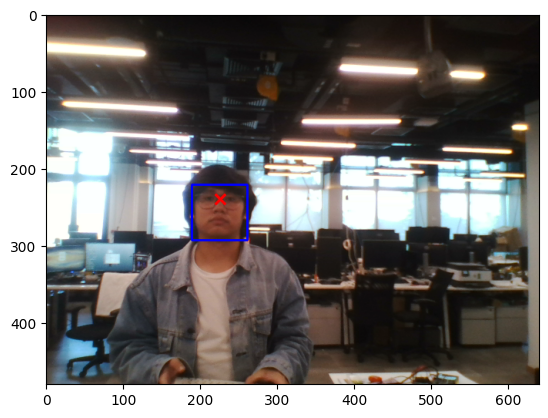

(226, 240)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125549_600931_right_eye.png


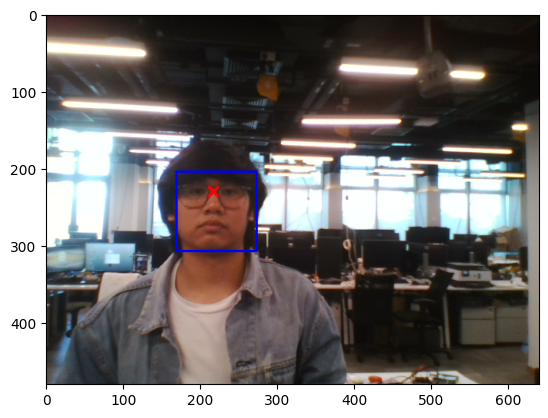

(217, 230)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125613_253178_right_eye.png


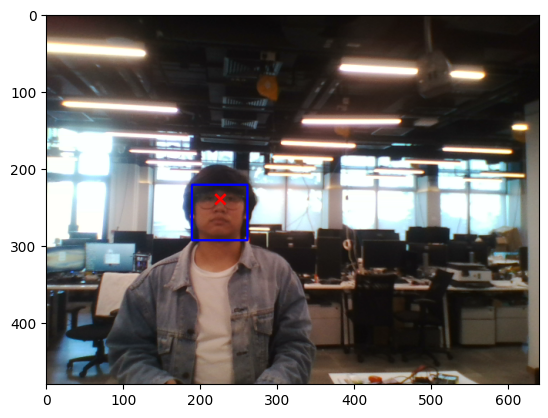

(226, 240)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125613_253180_right_eye.png


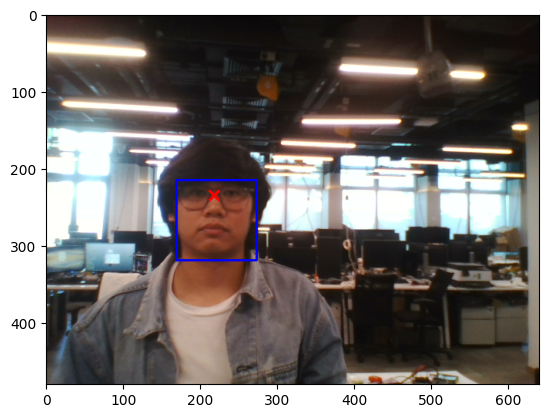

(218, 235)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125626_593321_right_eye.png


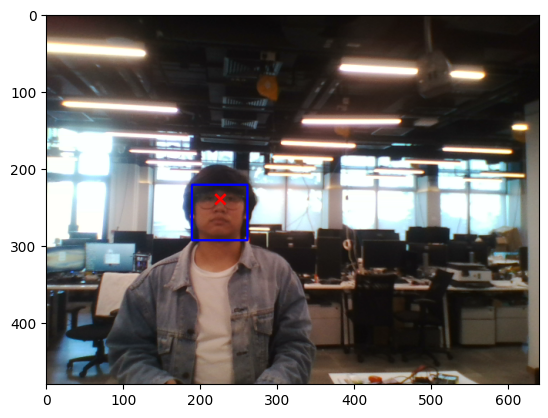

(226, 240)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125631_465443_right_eye.png


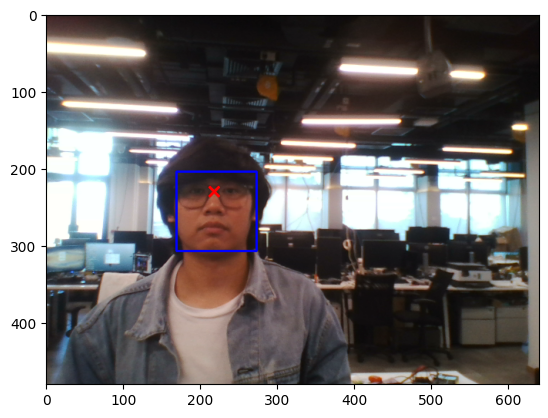

(218, 230)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125658_213677_right_eye.png


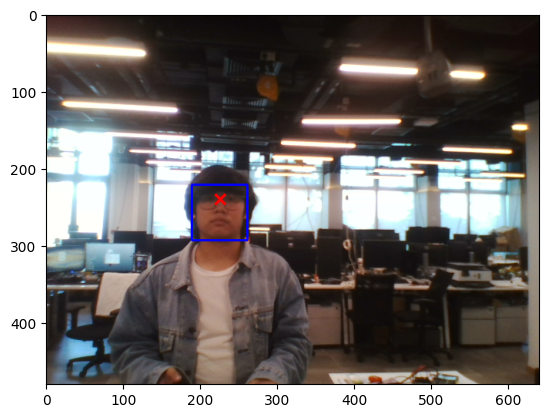

(226, 240)
/home/jaynieles/dev/grace_robot/results/231122_center_calib_2_filt3/20231122_125658_213680_right_eye.png


In [5]:
# Check Images
for i in range(len(disp_img_list)):
    img = disp_img_list[i]
    plt.imshow(img)
    plt.show()
    print(pixel_list[i])
    print(image_path_list[i])

# DataFrame

# Analysis

## Data Filtering

In [34]:
# Data Gathering

left_pixel_x_list = []
left_pixel_y_list = []
right_pixel_x_list = []
right_pixel_y_list = []
for i in range(len(image_list)):
    x = pixel_list[i]
    if i//10 == 0:
        left_pixel_x_list.append(pixel_list[i][0])
        left_pixel_y_list.append(pixel_list[i][1])
    elif i//10 == 1:
        right_pixel_x_list.append(pixel_list[i][0])
        right_pixel_y_list.append(pixel_list[i][1])

mean_left_pixel_x = np.mean(left_pixel_x_list)
std_left_pixel_x = np.std(left_pixel_x_list)
mean_left_pixel_y = np.mean(left_pixel_y_list)
std_left_pixel_y = np.std(left_pixel_y_list)

mean_right_pixel_x = np.mean(right_pixel_x_list)
std_right_pixel_x = np.std(right_pixel_x_list)
mean_right_pixel_y = np.mean(right_pixel_y_list)
std_right_pixel_y = np.std(right_pixel_y_list)

print('mean_left_pixel_x:', mean_left_pixel_x)
print('std_left_pixel_x:',std_left_pixel_x)
print('mean_left_pixel_y:',mean_left_pixel_y)
print('std_left_pixel_y:',std_left_pixel_y)

print('mean_right_pixel_x:',mean_right_pixel_x)
print('std_right_pixel_x:',std_right_pixel_x)
print('mean_right_pixel_y:',mean_right_pixel_y)
print('std_right_pixel_y:',std_right_pixel_y)

mean_left_pixel_x: 360.6
std_left_pixel_x: 5.161395160225576
mean_left_pixel_y: 224.7
std_left_pixel_y: 6.261788881781308
mean_right_pixel_x: 222.3
std_right_pixel_x: 3.579106033634656
mean_right_pixel_y: 235.9
std_right_pixel_y: 4.657252408878007


In [32]:
left_pixel_x_list

[360, 369, 358, 368, 350, 360, 358, 359, 364, 360]

## Plotting

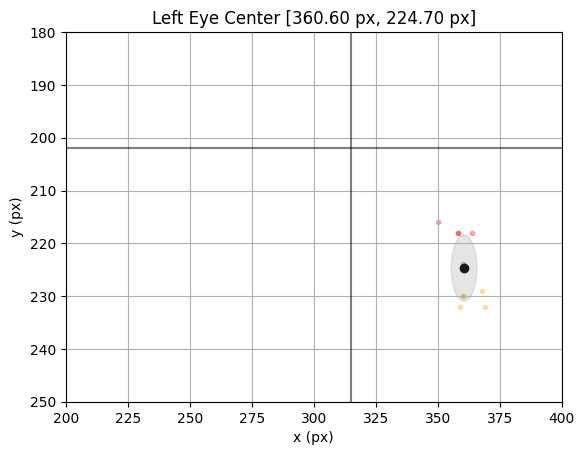

In [49]:
# Left Eye

for i in range(len(image_list)):
    x = pixel_list[i][0]
    y = pixel_list[i][1]
    if i//10 == 0:
        marker='.'
    if i%2== 0:
        color = 'red'
    elif i%2 == 1:
        color = 'orange'
    alpha = 0.3
    if i//10 == 0:
        plt.scatter(x,y, color=color, marker=marker, alpha=alpha)

# Left Eye
plt.axhline(y=202, color='black', alpha=0.5)
plt.axvline(x=315, color='black', alpha=0.5)

plt.scatter(mean_left_pixel_x, mean_left_pixel_y, color='black')
ellipse = Ellipse((mean_left_pixel_x, mean_left_pixel_y), 
                  width=std_left_pixel_x*2, 
                  height=std_left_pixel_y*2, 
                  fill=True, color='gray', label='Std Dev', alpha=0.2)
plt.gca().add_patch(ellipse)

plt.xlim([200, 400])
plt.ylim([250,180])     
plt.ylabel('y (px)')
plt.xlabel('x (px)')
plt.grid()
plt.title('Left Eye Center [%.2f px, %.2f px]' % (mean_left_pixel_x, mean_left_pixel_y))
plt.show()

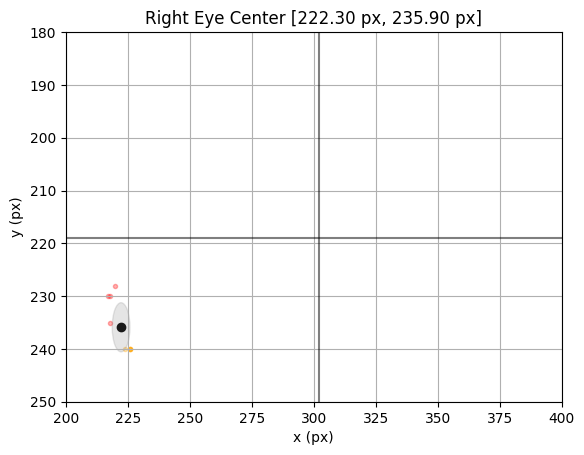

In [50]:
# Right Eye

for i in range(len(image_list)):
    x = pixel_list[i][0]
    y = pixel_list[i][1]
    if i//10 == 1:
        marker='.'
    if i%2== 0:
        color = 'red'
    elif i%2 == 1:
        color = 'orange'
    alpha = 0.3
    if i//10 == 1:
        plt.scatter(x,y, color=color, marker=marker, alpha=alpha)

# Right Eye
plt.axhline(y=219, color='black', alpha=0.5)
plt.axvline(x=302, color='black', alpha=0.5)

plt.scatter(mean_right_pixel_x, mean_right_pixel_y, color='black')
ellipse = Ellipse((mean_right_pixel_x, mean_right_pixel_y), 
                  width=std_right_pixel_x*2, 
                  height=std_right_pixel_y*2, 
                  fill=True, color='gray', label='Std Dev', alpha=0.2)
plt.gca().add_patch(ellipse)

plt.xlim([200, 400])
plt.ylim([250,180])    
plt.ylabel('y (px)')
plt.xlabel('x (px)')
plt.grid()
plt.title('Right Eye Center [%.2f px, %.2f px]' % (mean_right_pixel_x, mean_right_pixel_y))
plt.show()